<a href="https://colab.research.google.com/github/SolFreire/SingleLayerPerceptronNetworkIrisProblem/blob/main/SingleLayerPerceptronNetworkIrisProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns

In [16]:
class PerceptronMulticlass:
    def __init__(self, n_features, n_classes, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.n_classes = n_classes
        self.weights = torch.randn(n_classes, n_features, dtype=torch.float32)
        self.bias = torch.full((n_classes,), -1.0)
        self.errors_per_epoch = []

    def activation(self, x):
        return torch.where(x >= 0, 1.0, 0.0)

    def fit(self, X, y_one_hot):
        X = torch.tensor(X, dtype=torch.float32)
        y_one_hot = torch.tensor(y_one_hot, dtype=torch.float32)

        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y_one_hot):
                z = torch.matmul(self.weights, xi) + self.bias
                y_pred = self.activation(z)
                update = self.lr * (target - y_pred)
                if torch.any(update != 0):

                    for j in range(self.n_classes):
                        self.weights[j] += update[j] * xi
                        self.bias[j] += update[j]
                    errors += 1

            self.errors_per_epoch.append(errors)

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        z = torch.matmul(self.weights, X.T).T + self.bias
        return torch.argmax(z, dim=1).numpy()

In [24]:
data = load_iris()
X = data.data
y = data.target

Realização 1: Acurácia = 0.8000
Realização 2: Acurácia = 0.8333
Realização 3: Acurácia = 0.9333
Realização 4: Acurácia = 0.9000
Realização 5: Acurácia = 1.0000
Realização 6: Acurácia = 0.7667
Realização 7: Acurácia = 0.8667
Realização 8: Acurácia = 0.9333
Realização 9: Acurácia = 0.9667
Realização 10: Acurácia = 0.7333
Realização 11: Acurácia = 0.9333
Realização 12: Acurácia = 0.9667
Realização 13: Acurácia = 0.8000
Realização 14: Acurácia = 0.6667
Realização 15: Acurácia = 0.7333
Realização 16: Acurácia = 0.8667
Realização 17: Acurácia = 0.8333
Realização 18: Acurácia = 0.9667
Realização 19: Acurácia = 0.9333
Realização 20: Acurácia = 1.0000

 Resultados gerais:
Acurácia média: 0.8717
Desvio padrão:  0.0950
Melhor realização: 5 (Acurácia = 1.0000)


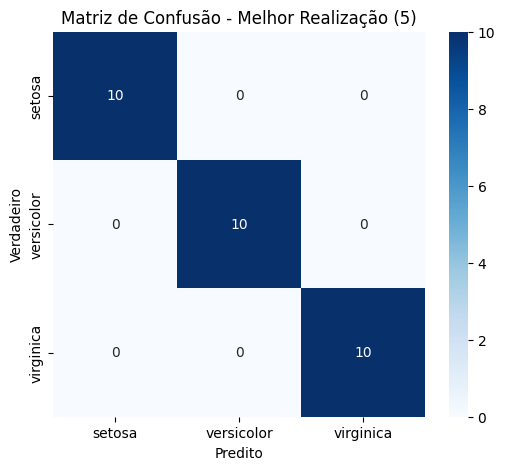

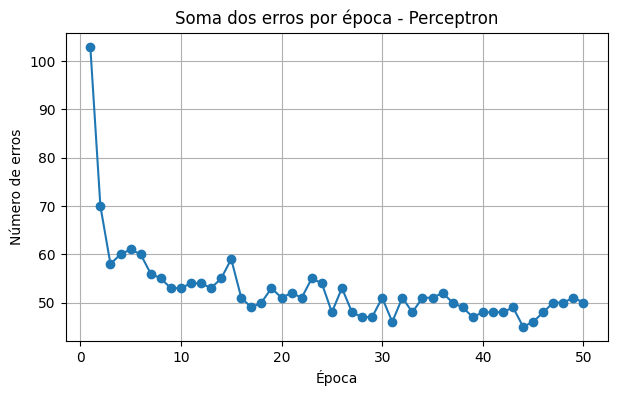

In [26]:
accuracies = []
conf_matrices = []

for run in range(20):
    X_train, X_test, y_train_labels, y_test_labels = train_test_split(X, y, test_size=0.2, stratify=y, random_state=run)
    y_train = np.eye(3)[y_train_labels]
    model = PerceptronMulticlass( 4, 3, lr=0.01, epochs=50)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test_labels, y_pred)
    accuracies.append(acc)
    conf_matrices.append(confusion_matrix(y_test_labels, y_pred))

    print(f"Realização {run+1}: Acurácia = {acc:.4f}")

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
best_run = np.argmax(accuracies)

print("\n Resultados gerais:")
print(f"Acurácia média: {mean_acc:.4f}")
print(f"Desvio padrão:  {std_acc:.4f}")
print(f"Melhor realização: {best_run+1} (Acurácia = {accuracies[best_run]:.4f})")

best_conf = conf_matrices[best_run]

plt.figure(figsize=(6, 5))
sns.heatmap(best_conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title(f"Matriz de Confusão - Melhor Realização ({best_run+1})")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

# erros por época da última execução
plt.figure(figsize=(7, 4))
plt.plot(range(1, len(model.errors_per_epoch)+1), model.errors_per_epoch, marker='o')
plt.title("Soma dos erros por época - Perceptron")
plt.xlabel("Época")
plt.ylabel("Número de erros")
plt.grid(True)
plt.show()


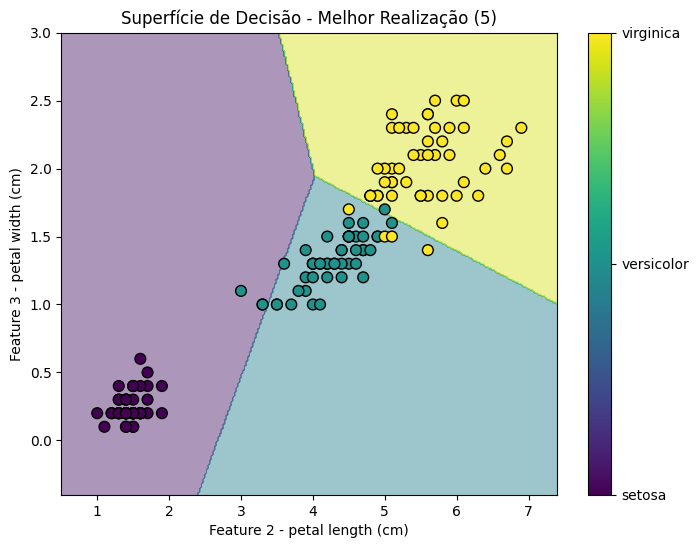

In [29]:
feat1 = 2
feat2 = 3


best_run = np.argmax(accuracies)

X_train, X_test, y_train_labels, y_test_labels = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=best_run
)

y_train = np.eye(3)[y_train_labels]

best_model = PerceptronMulticlass(4, 3, lr=0.01, epochs=50)
best_model.fit(X_train, y_train)

feat1 = 2   # petal length
feat2 = 3   # petal width

x_min, x_max = X[:, feat1].min() - 0.5, X[:, feat1].max() + 0.5
y_min, y_max = X[:, feat2].min() - 0.5, X[:, feat2].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

X_grid = np.zeros((xx.size, 4))
X_grid[:, feat1] = xx.ravel()
X_grid[:, feat2] = yy.ravel()

for f in range(4):
    if f not in [feat1, feat2]:
        X_grid[:, f] = X[:, f].mean()

Z = best_model.predict(X_grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.45, cmap='viridis')

scatter = plt.scatter(
    X[:, feat1], X[:, feat2],
    c=y, cmap='viridis',
    edgecolor='black', s=60
)

plt.xlabel(f"Feature {feat1} - {data.feature_names[feat1]}")
plt.ylabel(f"Feature {feat2} - {data.feature_names[feat2]}")
plt.title(f"Superfície de Decisão - Melhor Realização ({best_run+1})")

cbar = plt.colorbar(scatter, ticks=[0, 1, 2])
cbar.ax.set_yticklabels(data.target_names)

plt.show()


Acurácia: 0.6666666666666666
